In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import seaborn as sns #sets up styles and gives us more plotting optionsimport numpy as np

In [2]:
data=pd.read_csv("logistic_hw.csv", error_bad_lines=False) 

In [3]:
data.head(10)

,X1,X2,Y
0,3.81,-0.55,1
1,0.23,3.37,1
2,3.05,3.53,1
3,0.68,1.84,1
4,2.67,2.74,1
5,-2.04,-1.25,0
6,-0.72,-3.35,0
7,-2.46,-1.31,0
8,-3.51,0.13,0
9,-2.05,-2.82,0


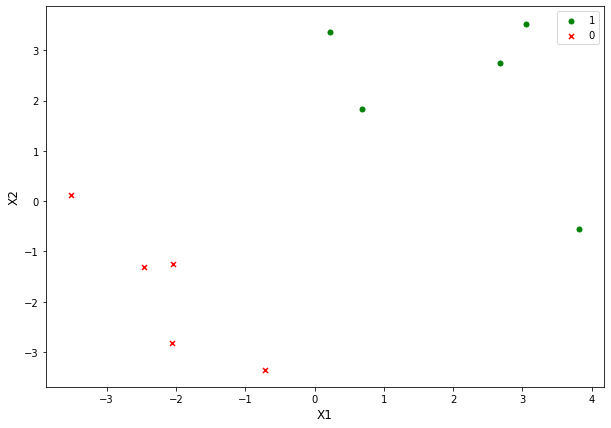

In [5]:
#Extract Trues/Falses (1s and 0s)
trues = data[data.Y.values == 1]
falses = data[data.Y.values == 0]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(trues['X1'],trues['X2'], s=25, c='g', marker="o", label='1')
ax1.scatter(falses['X1'],falses['X2'], s=25, c='r', marker="x", label='0')
plt.legend(loc='upper right');
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
fig.set_size_inches(10, 7) 
plt.show()

In [38]:
x1 = data.X1.values
x2 = data.X2.values
Y = data.Y.values
X12 = data[['X1','X2']]
x12 = X12.to_numpy()  # the same as  X12.values
X = np.hstack([np.ones((X12.shape[0], 1)), X12.values])

In [65]:
X = data.values[:, :-1]

In [24]:
X.shape

(10, 3)

In [67]:
X[:,0]

array([ 3.81,  0.23,  3.05,  0.68,  2.67, -2.04, -0.72, -2.46, -3.51,
       -2.05])

In [17]:
# Initializing variables
b0 = 0
b1 = 0
b2 = 0
L = 0.001
epochs = 300

# Method for predictions
def sigmoid(X, b0, b1, b2):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x[0] + -1*b2*x[1] )) for x in X])

In [28]:
for epoch in range(epochs):
    y_pred = sigmoid(X, b0, b1, b2)
    D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
    D_b1 = -2 * sum(X[:,1] * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
    D_b2 = -2 * sum(X[:,2] * (Y - y_pred) * y_pred * (1 - y_pred)) # Derivative of loss wrt b2
    # Update b0, b1 and b2
    b0 = b0 - L * D_b0
    b1 = b1 - L * D_b1
    b2 = b2 - L * D_b2

In [29]:
print(b0,b1,b2)

-0.08729310125993082 0.6283062544824546 0.8591163816862106


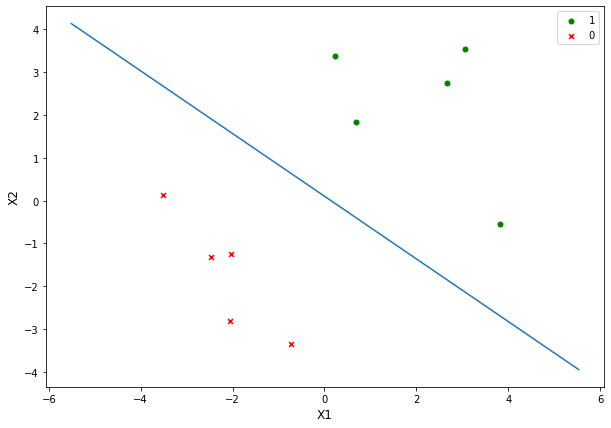

In [53]:
import matplotlib.pyplot as plt

A = [X[:,1], X[:,2]]
colors = ["green", "blue"] # colours for Scatter Plot
# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(X[:,1]) - 2, max(X[:,2]) + 2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/b2) * (b1 * plot_x + b0)
# Plotting the Single Line Decision Boundary
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(trues['X1'],trues['X2'], s=25, c='g', marker="o", label='1')
ax1.scatter(falses['X1'],falses['X2'], s=25, c='r', marker="x", label='0')
plt.legend(loc='upper right');
plt.plot(plot_x, plot_y, label = "Decision_Boundary")
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
fig.set_size_inches(10, 7) 
plt.show()

In [54]:
data['X1sq'] = data['X1'].pow(2)
data['X2sq'] = data['X2'].pow(2)
data['X1X2'] = data['X1']*data['X2']

In [56]:
Xcols = data[['X1','X2','X1sq','X2sq','X1X2']]
#x12 = X12.to_numpy()  # the same as  X12.values
X = np.hstack([np.ones((X12.shape[0], 1)), Xcols.values])

In [68]:
X = data[['X1','X2','X1sq','X2sq','X1X2']].to_numpy()

In [70]:
# Initializing variables
b0 = 0
b1 = 0
b2 = 0
b3 = 0
b4 = 0
b5 = 0
L = 0.001
epochs = 300

# Method for predictions
def sigmoid(X, b0, b1, b2, b3, b4, b5):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x[0] + -1*b2*x[1] + -1*b2*x[2] + -1*b2*x[3] + -1*b2*x[4])) for x in X])

In [63]:
X

array([[ 3.81  , -0.55  , 14.5161,  0.3025, -2.0955],
       [ 0.23  ,  3.37  ,  0.0529, 11.3569,  0.7751],
       [ 3.05  ,  3.53  ,  9.3025, 12.4609, 10.7665],
       [ 0.68  ,  1.84  ,  0.4624,  3.3856,  1.2512],
       [ 2.67  ,  2.74  ,  7.1289,  7.5076,  7.3158],
       [-2.04  , -1.25  ,  4.1616,  1.5625,  2.55  ],
       [-0.72  , -3.35  ,  0.5184, 11.2225,  2.412 ],
       [-2.46  , -1.31  ,  6.0516,  1.7161,  3.2226],
       [-3.51  ,  0.13  , 12.3201,  0.0169, -0.4563],
       [-2.05  , -2.82  ,  4.2025,  7.9524,  5.781 ]])

In [71]:
for epoch in range(epochs):
    y_pred = sigmoid(X, b0, b1, b2, b3, b4, b5)
    D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
    D_b1 = -2 * sum(X[:,0] * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
    D_b2 = -2 * sum(X[:,1] * (Y - y_pred) * y_pred * (1 - y_pred)) # Derivative of loss wrt b2
    D_b3 = -2 * sum(X[:,2] * (Y - y_pred) * y_pred * (1 - y_pred))
    D_b4 = -2 * sum(X[:,3] * (Y - y_pred) * y_pred * (1 - y_pred))
    D_b5 = -2 * sum(X[:,4] * (Y - y_pred) * y_pred * (1 - y_pred))
    # Update b0, b1 and b2
    b0 = b0 - L * D_b0
    b1 = b1 - L * D_b1
    b2 = b2 - L * D_b2
    b3 = b3 - L * D_b3
    b4 = b4 - L * D_b4
    b5 = b5 - L * D_b5

In [72]:
print(b0,b1,b2,b3,b4,b5)

-0.2419783995682602 0.6435114150137241 0.43122919917024943 -1.4586257311779816 -0.7457030639503046 -0.5920297246775824


In [14]:
#LDA
label1 = data[data.Y.values == 1]
label2 = data[data.Y.values == 0]
#X12 = data[['X1','X2']]
#x12 = X12.to_numpy()  #
#A = [X[:,1], X[:,2]]

In [9]:
label1 = label1[['X1','X2']]

In [5]:
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])

In [6]:
rectangles

array([[1.  , 1.5 , 1.7 , 1.45, 1.1 , 1.6 , 1.8 ],
       [1.8 , 1.55, 1.45, 1.6 , 1.65, 1.7 , 1.75]])

In [8]:
rectangles.shape

(2, 7)

In [10]:
label1 = label1.to_numpy()

In [13]:
label1.reshape(2,5)

array([[ 3.81, -0.55,  0.23,  3.37,  3.05],
       [ 3.53,  0.68,  1.84,  2.67,  2.74]])

In [16]:
label1 = np.array([[3.81, 0.23, 3.05, 0.68, 2.67],[-0.55, 3.37, 3.53, 1.84, 2.74]])
label2 = np.array([[-2.04, -0.72, -2.46, -3.51, -2.05],[-1.25, -3.35, -1.31, 0.13, -2.82]])

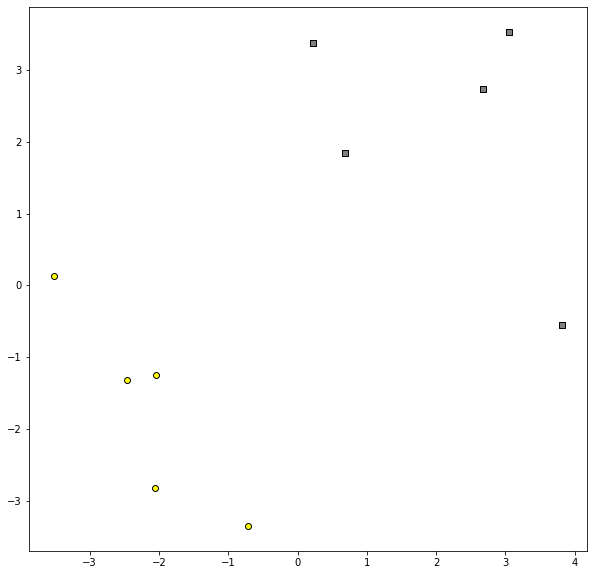

In [17]:
#Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(label1[0],label1[1],marker='s',c='grey',edgecolor='black')
ax0.scatter(label2[0],label2[1],marker='o',c='yellow',edgecolor='black')

In [ ]:
# Calculate the mean vectors per class
mean_label1 = np.mean(label1,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_label2 = np.mean(label2,axis=1).reshape(2,1)


# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up

scatter_label1 = np.dot((label1-mean_label1),(label1-mean_label1).T)
scatter_label2 = np.dot((label2-mean_label2),(label2-mean_label2).T)


# Calculate the SW by adding the scatters within classes 
SW = scatter_label1+scatter_label2
print(SW)


plt.show()